In [4]:
import sys
sys.path.append("..")
import library as lb
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
# Uniform and Exponential tests
n_runs = 10000

# Uniform theoretical
a, b = -10, 5
cdf_uniform = lambda x : (x-a)/(b-a)
cdf_inv_uniform = lambda x : a + (b-a)*x
uniform_mean = (a+b)/2
uniform_var = 1/12*(b-a)**2

# Exponential theoretical
lamb = 1
cdf_exp = lambda x : 1 - np.exp(-lamb*x)
cdf_inv_exp = lambda x : np.log(1-x) / (-lamb)
exp_mean = 1/lamb
exp_var = 1/lamb**2

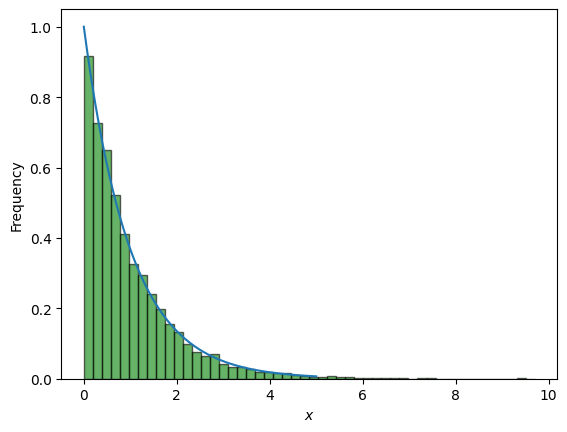

In [21]:
# plot the exponential PDF
x = np.linspace(0, 5, 100)
plt.plot(x, lamb*np.exp(-lamb*x))

# Plot histogram with black lines between each bar
exp_hist = []
for i in range(n_runs):
    exp_hist.append(cdf_inv_exp(np.random.rand()))
plt.hist(exp_hist, bins=50, density=True, color='green', edgecolor='black', alpha=0.6)

plt.xlabel('$x$')
plt.ylabel('Frequency')

plt.show()

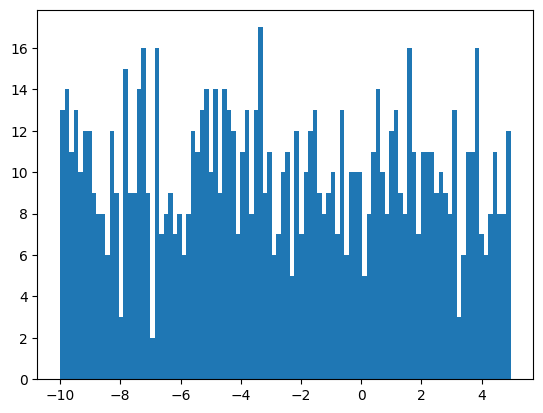

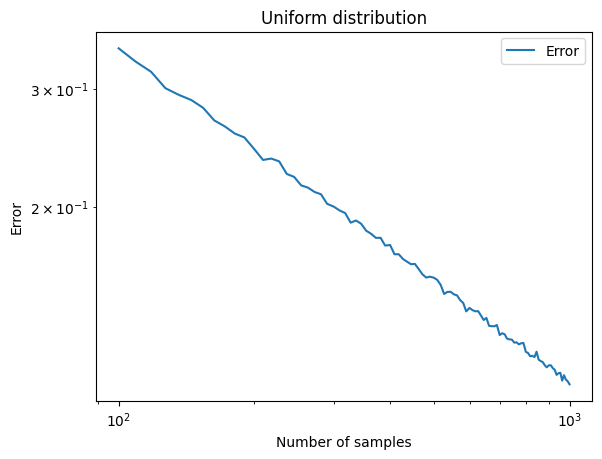

In [6]:
# Uniform empirical
n = np.linspace(100, 1000, 100, dtype=int)

error = np.zeros(len(n))
for _ in range(n_runs):
    samples = [lb.CDF_Inverse(cdf_inv_uniform, n[i]) for i in range(len(n))]
    error += [np.abs(np.mean(samples[i])-uniform_mean) for i in range(len(n))]
    
error /= n_runs

# Plot the histogram
plt.hist(samples[-1], bins=100)
plt.show()

# Plot the error and its regression line
plt.loglog(n, error, label='Error')
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.title('Uniform distribution')
plt.legend()
plt.show()


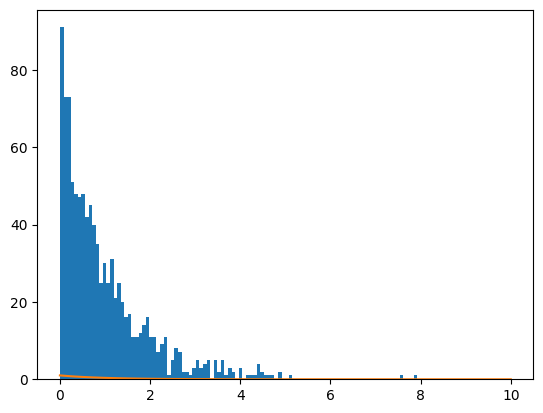

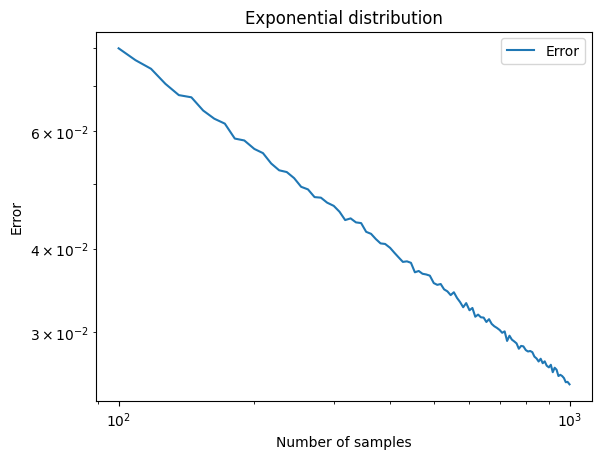

In [7]:
# Exponential empirical
n = np.linspace(100, 1000, 100, dtype=int)

error = np.zeros(len(n))
for _ in range(n_runs):
    samples = [lb.CDF_Inverse(cdf_inv_exp, n[i]) for i in range(len(n))]
    error += [np.abs(np.mean(samples[i])-exp_mean) for i in range(len(n))]
    
error /= n_runs

# Plot the histogram and the PDF of the Exponential
plt.hist(samples[-1], bins=100)
x = np.linspace(0, 10, 100)
plt.plot(x, lamb*np.exp(-lamb*x), label='PDF')
plt.show()

# Plot the error and its regression line
plt.loglog(n, error, label='Error')
plt.xlabel('Number of samples')
plt.ylabel('Error')
plt.title('Exponential distribution')
plt.legend()
plt.show()
